<a href="https://colab.research.google.com/github/DennisWayo/Classical-Machine-Learning-/blob/main/myML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Classical Machine Learning
- Linear Regression
- Logistic Regression
- FeedForward Neural Network
- Deep Neural Network
- Recurrent Neural Network
- Long Short-Term Memory  

In [ ]:
import tensorflow as tf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, LSTM, SimpleRNN, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'png'

In [ ]:
# Correct path to the uploaded file
file_path = 'epsx1_real.csv'  # Use the actual uploaded file ID path

# Read the Excel file
data = pd.read_csv(file_path)

# Display the first few rows to confirm successful loading
data.transpose()
#print(data.head)
#print(data.size)
#print(data.columns)

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
Photon Energy,0.70,0.71,0.71,0.71,0.71,0.72,0.72,0.72,0.72,0.73,...,5.68,5.68,5.68,5.69,5.69,5.69,5.69,5.70,5.70,5.70
Absorption,7.24,7.24,7.25,7.25,7.26,7.27,7.27,7.28,7.28,7.29,...,-9.75,-9.70,-9.66,-9.61,-9.57,-9.52,-9.48,-9.44,-9.39,-9.35


In [ ]:
# Load the dataset
X = data[['Photon Energy']].values.reshape(-1, 1)  # Reshape to (n_samples, 1) for Qiskit compatibility
y = data['Absorption'].values  # Target variable

In [ ]:
X.shape, X.size, X.ndim, X.dtype

((2000, 1), 2000, 2, dtype('float64'))

In [ ]:
y.shape, y.size, y.ndim, y.dtype

((2000,), 2000, 1, dtype('float64'))

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Reshape data for LSTM and RNN (assuming timesteps = 1 for this example)
timesteps = 1
features = X_train.shape[1]  # Number of features
X_train_lstm = X_train.reshape(-1, timesteps, features)
X_test_lstm = X_test.reshape(-1, timesteps, features)

In [ ]:
# Determine the number of classes
num_classes = len(np.unique(y))

if num_classes > 2:
    # Multiclass classification
    y_train = to_categorical(y_train, num_classes)
    y_test = to_categorical(y_test, num_classes)
    output_units = num_classes
    activation = 'softmax'
    loss = 'categorical_crossentropy'
else:
    # Binary classification
    output_units = 1
    activation = 'sigmoid'
    loss = 'binary_crossentropy'

Linear Regression - MSE: 0.00, R2: 0.97


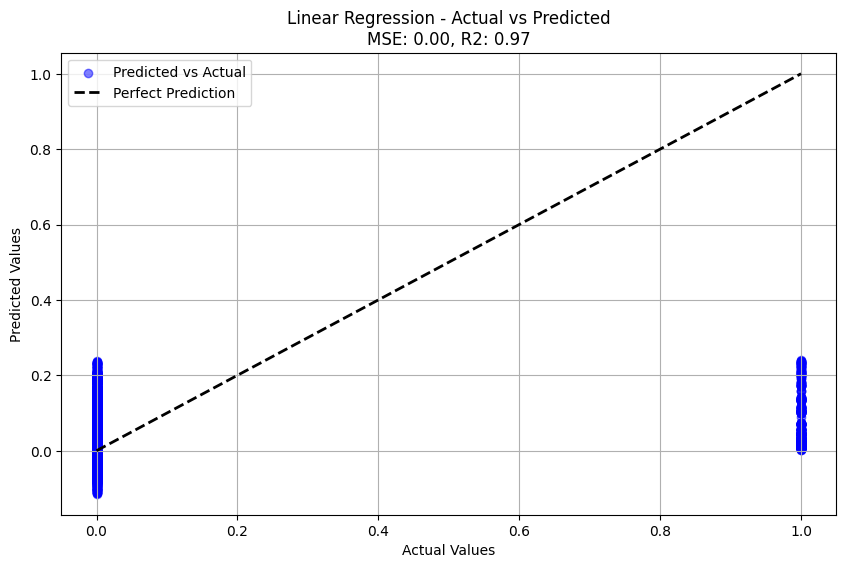

In [ ]:

# Architecture 1
# Define the Linear Regression model

# Initialize and train the linear regression model
linear_model = LinearRegression(fit_intercept=True)
linear_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = linear_model.predict(X_test)

# Evaluate the model with metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Linear Regression - MSE: {mse:.2f}, R2: {r2:.2f}")

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Linear Regression - Actual vs Predicted\nMSE: {mse:.2f}, R2: {r2:.2f}')
plt.legend()
plt.grid(True)
#plt.savefig('linear_regression_plot.png', format='png')
plt.show()



In [ ]:
# Architecture 2
# Define the Logistic Regression model
logistic_model = Sequential([
    Dense(output_units, activation=activation, input_shape=(X_train.shape[1],))
])

logistic_model.compile(optimizer=Adam(learning_rate=0.02, epsilon=1e-7, ema_momentum=0.99), loss=loss, metrics=['accuracy'])
logistic_history = logistic_model.fit(X_train, y_train, epochs=500, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
logistic_eval = logistic_model.evaluate(X_test, y_test)
print("\nLogistic Regression Test Accuracy:", logistic_eval[1])

Epoch 1/500


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.0777 - loss: 6.8728 - val_accuracy: 0.1175 - val_loss: 5.2887
Epoch 2/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0925 - loss: 4.9059 - val_accuracy: 0.1250 - val_loss: 3.8387
Epoch 3/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1295 - loss: 3.7072 - val_accuracy: 0.1250 - val_loss: 3.2924
Epoch 4/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1282 - loss: 3.2861 - val_accuracy: 0.1300 - val_loss: 3.0920
Epoch 5/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1442 - loss: 3.0782 - val_accuracy: 0.1300 - val_loss: 2.9891
Epoch 6/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1421 - loss: 2.9978 - val_accuracy: 0.1825 - val_loss: 2.9192
Epoch 7/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1645 - loss: 2.9165 - val_accuracy: 0.1825 - val_loss: 2.8734
Epoch 8/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1578 - loss: 2.8659 - val_accuracy: 0.1225 - val_loss: 2.

In [ ]:
# Architecture 3
#Feedforward Neural Network
ffnn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

ffnn_model.compile(optimizer=Adam(learning_rate=0.02, epsilon=1e-7, ema_momentum=0.99), loss='categorical_crossentropy', metrics=['accuracy'])
ffnn_history = ffnn_model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
ffnn_eval = ffnn_model.evaluate(X_test, y_test)
print("\Feedforward Neural Network Test Accuracy:", ffnn_eval[1])

Epoch 1/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.1048 - loss: 4.5555 - val_accuracy: 0.1550 - val_loss: 2.6276
Epoch 2/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1898 - loss: 2.5387 - val_accuracy: 0.3000 - val_loss: 2.4160
Epoch 3/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2429 - loss: 2.4018 - val_accuracy: 0.2525 - val_loss: 2.2619
Epoch 4/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2882 - loss: 2.2150 - val_accuracy: 0.3450 - val_loss: 2.1015
Epoch 5/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3045 - loss: 2.0918 - val_accuracy: 0.3400 - val_loss: 1.9137
Epoch 6/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3503 - loss: 1.9381 - val_accuracy: 0.4100 - val_loss: 1.8263
Epoch 7/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3769 - loss: 1.8974 - val_accuracy: 0.3850 - val_loss: 1.8997
Epoch 8/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3505 - loss: 1.9460 - val_accuracy: 0.

In [ ]:
# Architecture 4
# Deep Neural Network (DNN) Model
dnn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(output_units, activation=activation)
])

dnn_model.compile(optimizer=Adam(learning_rate=0.02, epsilon=1e-7, ema_momentum=0.99), loss=loss, metrics=['accuracy'])
dnn_history = dnn_model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the DNN model
dnn_eval = dnn_model.evaluate(X_test, y_test)
print("\nDNN Test Accuracy:", dnn_eval[1])

Epoch 1/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.1004 - loss: 4.5265 - val_accuracy: 0.1400 - val_loss: 2.6761
Epoch 2/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1597 - loss: 2.6461 - val_accuracy: 0.1550 - val_loss: 2.3870
Epoch 3/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2143 - loss: 2.4094 - val_accuracy: 0.3275 - val_loss: 2.3099
Epoch 4/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.2439 - loss: 2.3298 - val_accuracy: 0.3275 - val_loss: 2.1225
Epoch 5/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2768 - loss: 2.2324 - val_accuracy: 0.3275 - val_loss: 2.1194
Epoch 6/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3029 - loss: 2.1435 - val_accuracy: 0.3800 - val_loss: 1.9958
Epoch 7/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3072 - loss: 2.1086 - val_accuracy: 0.3125 - val_loss: 2.0272
Epoch 8/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3091 - loss: 2.0683 - val_accuracy: 0

In [ ]:
# Architecture 5
# RNN Model
rnn_model = Sequential([
    SimpleRNN(64, input_shape=(timesteps, features), return_sequences=True),
    SimpleRNN(32),
    Dense(output_units, activation=activation)
])

rnn_model.compile(optimizer=Adam(learning_rate=0.02, epsilon=1e-7, ema_momentum=0.99), loss=loss, metrics=['accuracy'])
rnn_history = rnn_model.fit(X_train_lstm, y_train, epochs=500, batch_size=32, validation_data=(X_test_lstm, y_test))

# Evaluate the RNN model
rnn_eval = rnn_model.evaluate(X_test_lstm, y_test)
print("\nRNN Test Accuracy:", rnn_eval[1])

Epoch 1/500


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.1348 - loss: 4.6587 - val_accuracy: 0.2500 - val_loss: 2.4365
Epoch 2/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2555 - loss: 2.3690 - val_accuracy: 0.3475 - val_loss: 2.1600
Epoch 3/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3219 - loss: 2.1980 - val_accuracy: 0.3275 - val_loss: 2.0334
Epoch 4/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3302 - loss: 2.0212 - val_accuracy: 0.4025 - val_loss: 1.8987
Epoch 5/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3822 - loss: 1.9084 - val_accuracy: 0.4075 - val_loss: 1.8482
Epoch 6/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3820 - loss: 1.8838 - val_accuracy: 0.3350 - val_loss: 1.8678
Epoch 7/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3944 - loss: 1.7914 - val_accuracy: 0.3925 - val_loss: 1.8740
Epoch 8/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4125 - loss: 1.7996 - val_accuracy: 0.3925 - val_loss: 1.

In [15]:
# Architecture 6
# LSTM Model
lstm_model = Sequential([
    LSTM(64, input_shape=(timesteps, features), return_sequences=True),
    LSTM(32),
    Dense(output_units, activation=activation)
])

lstm_model.compile(optimizer=Adam(learning_rate=0.02, epsilon=1e-7, ema_momentum=0.99), loss=loss, metrics=['accuracy'])
lstm_history = lstm_model.fit(X_train_lstm, y_train, epochs=1000, batch_size=32, validation_data=(X_test_lstm, y_test))

# Evaluate the LSTM model
lstm_eval = lstm_model.evaluate(X_test_lstm, y_test)
print("\nLSTM Test Accuracy:", lstm_eval[1])

Epoch 1/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.1011 - loss: 5.5339 - val_accuracy: 0.1475 - val_loss: 2.7524
Epoch 2/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1683 - loss: 2.6788 - val_accuracy: 0.2400 - val_loss: 2.3900
Epoch 3/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.2587 - loss: 2.3645 - val_accuracy: 0.3125 - val_loss: 2.2028
Epoch 4/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3056 - loss: 2.1899 - val_accuracy: 0.3550 - val_loss: 2.0439
Epoch 5/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3320 - loss: 2.0372 - val_accuracy: 0.3575 - val_loss: 1.9109
Epoch 6/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3236 - loss: 1.9739 - val_accuracy: 0.3300 - val_loss: 1.8500
Epoch 7/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3228 - loss: 1.8711 - val_accuracy: 0.3525 - val_loss: 1.7830
Epoch 8/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3795 - loss: 1.7997 - val_accuracy: 0

In [16]:
# Evaluate each model
r2 = r2_score(y_test, y_pred)
logistic_eval = logistic_model.evaluate(X_test, y_test)
ffnn_eval = ffnn_model.evaluate(X_test, y_test)
dnn_eval = dnn_model.evaluate(X_test, y_test)
rnn_eval = rnn_model.evaluate(X_test_lstm, y_test)
lstm_eval = lstm_model.evaluate(X_test_lstm, y_test)

print(f"Linear Regression R2 Test Accuracy: {r2 *100:.2f}%")
print(f"\nLogistic Regression Test Accuracy: {logistic_eval[1] * 100:.2f}%")
print(f"Feedforward Neural Network Test Accuracy: {ffnn_eval[1] * 100:.2f}%")
print(f"\nDNN Test Accuracy: {dnn_eval[1] * 100: .2f}%")
print(f"\nRNN Test Accuracy: {rnn_eval[1] * 100: .2f}%")
print(f"LSTM Test Accuracy: {lstm_eval[1] * 100: .2f}%")

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2589 - loss: 2.2483 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7473 - loss: 0.5515 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4173 - loss: 2.8261 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5671 - loss: 1.1784 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8115 - loss: 0.4932 
Linear Regression R2 Test Accuracy: 96.73%

Logistic Regression Test Accuracy: 24.75%
Feedforward Neural Network Test Accuracy: 77.25%

DNN Test Accuracy:  44.25%

RNN Test Accuracy:  60.00%
LSTM Test Accuracy:  80.25%


In [17]:
import matplotlib.pyplot as plt

def plot_individual_actual_vs_predicted(models, model_names, X_test, y_test, num_samples=20):
    """
    Plots actual vs. predicted values in separate figures for each model.

    Parameters:
    - models: list of trained models
    - model_names: list of model names (same order as models)
    - X_test: test feature dataset
    - y_test: test labels
    - num_samples: number of samples to plot for readability
    """
    sample_indices = range(num_samples)

    # Plot each model in a separate figure
    for model, name in zip(models, model_names):
        y_pred = model.predict(X_test)

        # Handle binary and multiclass predictions
        if y_pred.ndim > 1 and y_pred.shape[1] > 1:  # Multi-class case
            y_pred = y_pred.argmax(axis=1)
        else:  # Binary classification case
            y_pred = (y_pred > 0.5).astype(int).flatten()

        # Create a new figure for each model
        plt.figure(figsize=(10, 6))
        plt.plot(sample_indices, y_test[:num_samples], 'o-')#, label='Actual', color='black')
        plt.plot(sample_indices, y_pred[:num_samples], 'x-')#, label='Predicted', color='blue')

        plt.title(f'Actual vs. Predicted - {name}')
        plt.xlabel('Sample Index')
        plt.ylabel('Class Label')
        plt.legend(loc='upper right')
        plt.grid(True)
        plt.show()

# Example usage with your models and names
models = [logistic_model, ffnn_model, dnn_model, rnn_model, lstm_model]
model_names = ['Logistic Regression', 'FFNN', 'DNN', 'RNN', 'LSTM']

# Call the function with test data and models
#plot_individual_actual_vs_predicted(models, model_names, X_test, y_test)

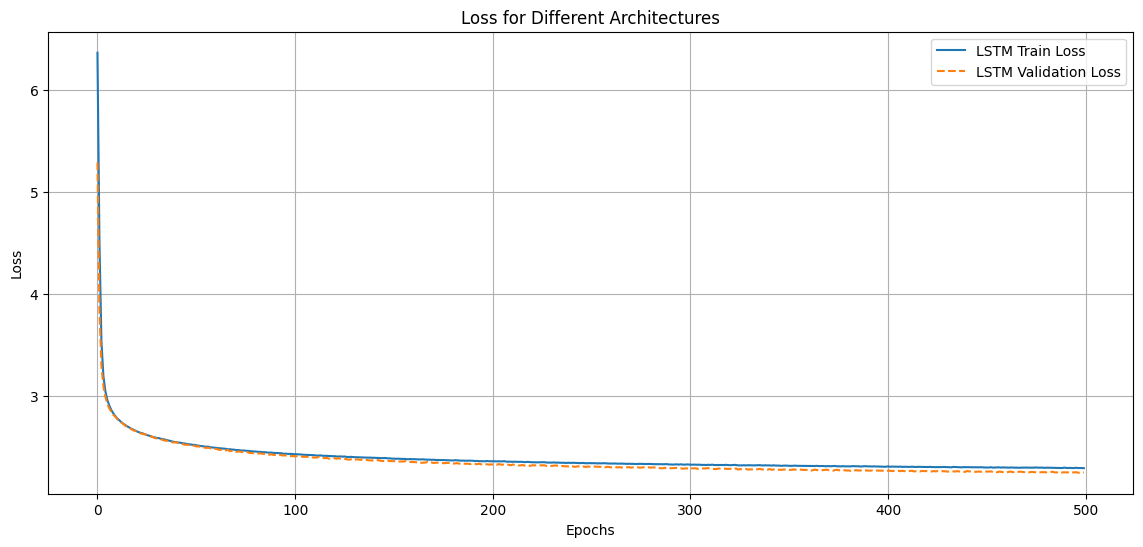

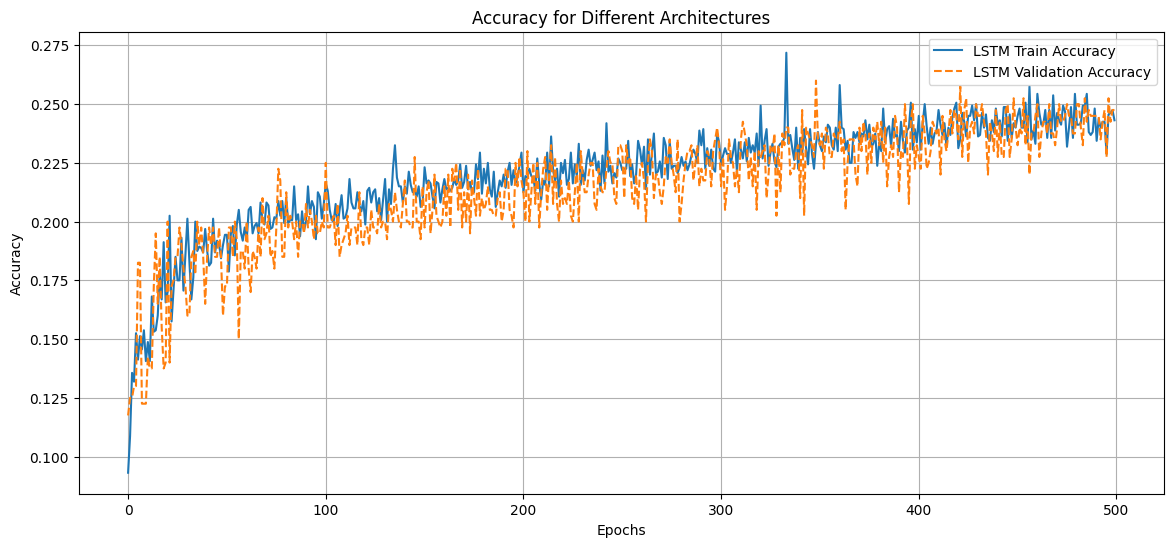

In [18]:
import matplotlib.pyplot as plt

# Function to plot loss and accuracy
def plot_metrics(histories, model_names, metric):
    plt.figure(figsize=(14, 6))

    # Plot each model's metric
    for history, name in zip(histories, model_names):
        plt.plot(history.history[metric], label=f'{name} Train {metric.capitalize()}')
        plt.plot(history.history[f'val_{metric}'], linestyle='--', label=f'{name} Validation {metric.capitalize()}')

    plt.title(f'{metric.capitalize()} for Different Architectures')
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.grid(True)
    plt.show()

# List of histories and corresponding names
histories = [logistic_history, dnn_history, rnn_history, lstm_history]
model_names = ['LSTM'] # 'Logistic Regression', 'Feedforward Neural Network', 'DNN', 'RNN',

# Plot loss
plot_metrics(histories, model_names, metric='loss')

# Plot accuracy
plot_metrics(histories, model_names, metric='accuracy')

In [19]:
import numpy as np

# Ensure y_test is in single-label integer format
y_test_single = np.argmax(y_test, axis=1) if len(y_test.shape) > 1 else y_test

# Ensure y_pred is also in single-label format for each model
y_pred_logistic = np.argmax(logistic_model.predict(X_test), axis=1)
y_pred_ffn = np.argmax(ffnn_model.predict(X_test), axis=1)
y_pred_dnn = np.argmax(dnn_model.predict(X_test), axis=1)
y_pred_rnn = np.argmax(rnn_model.predict(X_test), axis=1)
y_pred_lstm = np.argmax(lstm_model.predict(X_test), axis=1)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


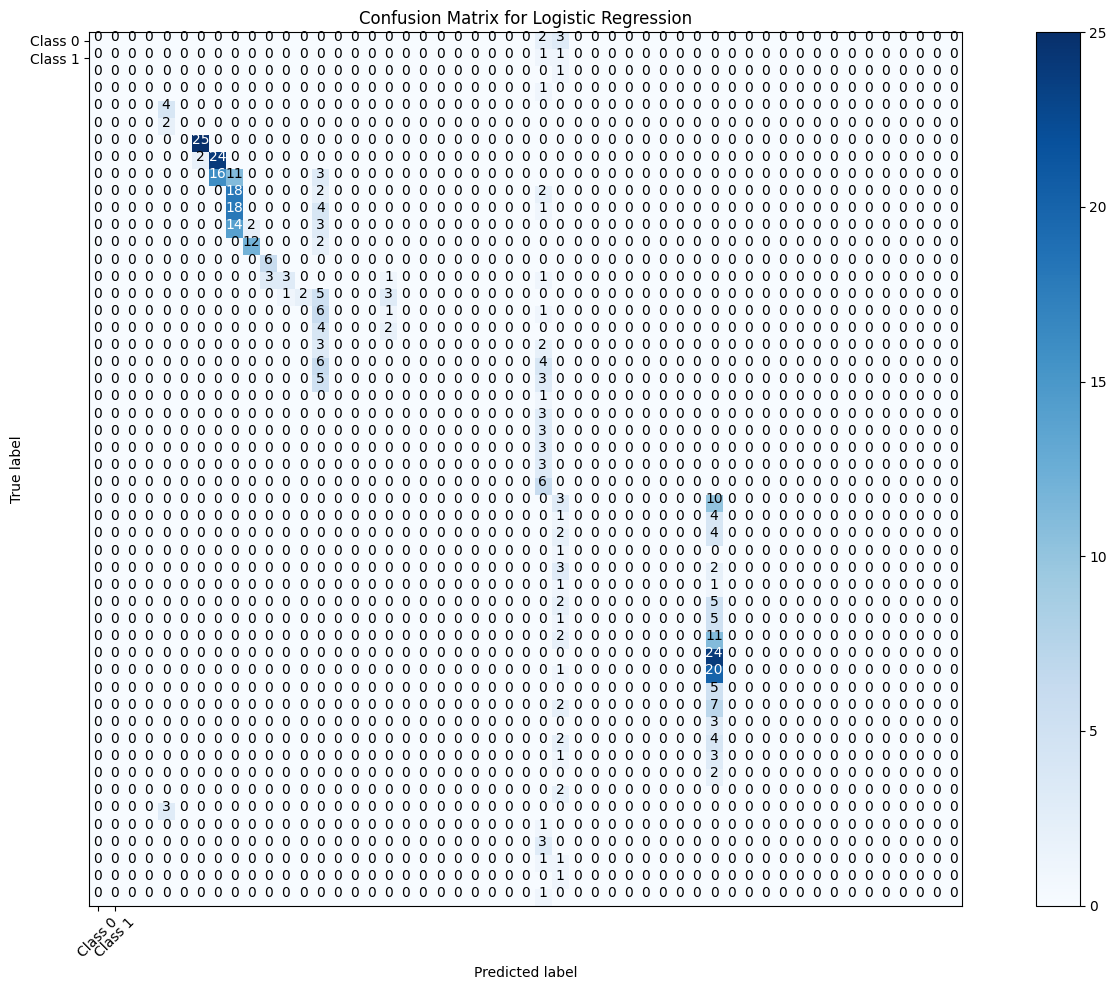

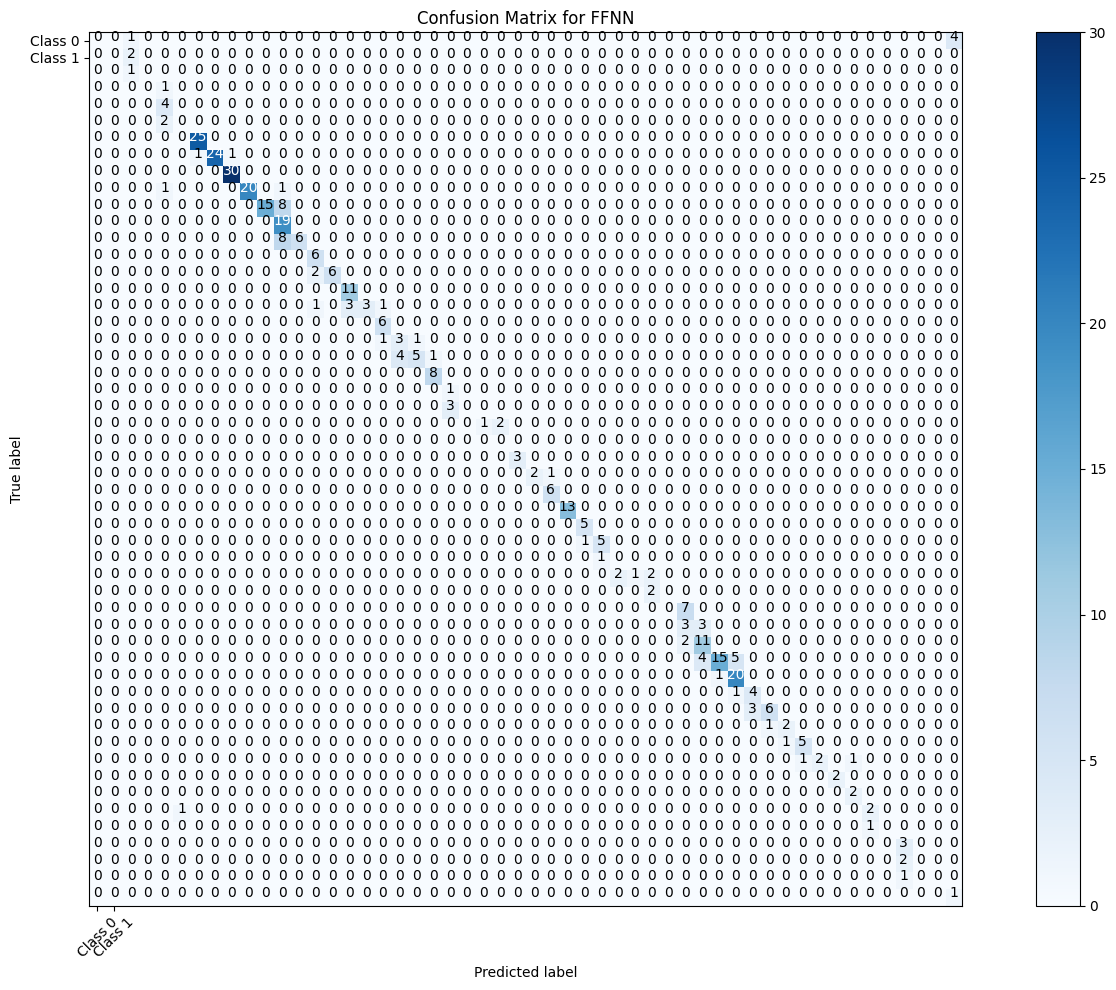

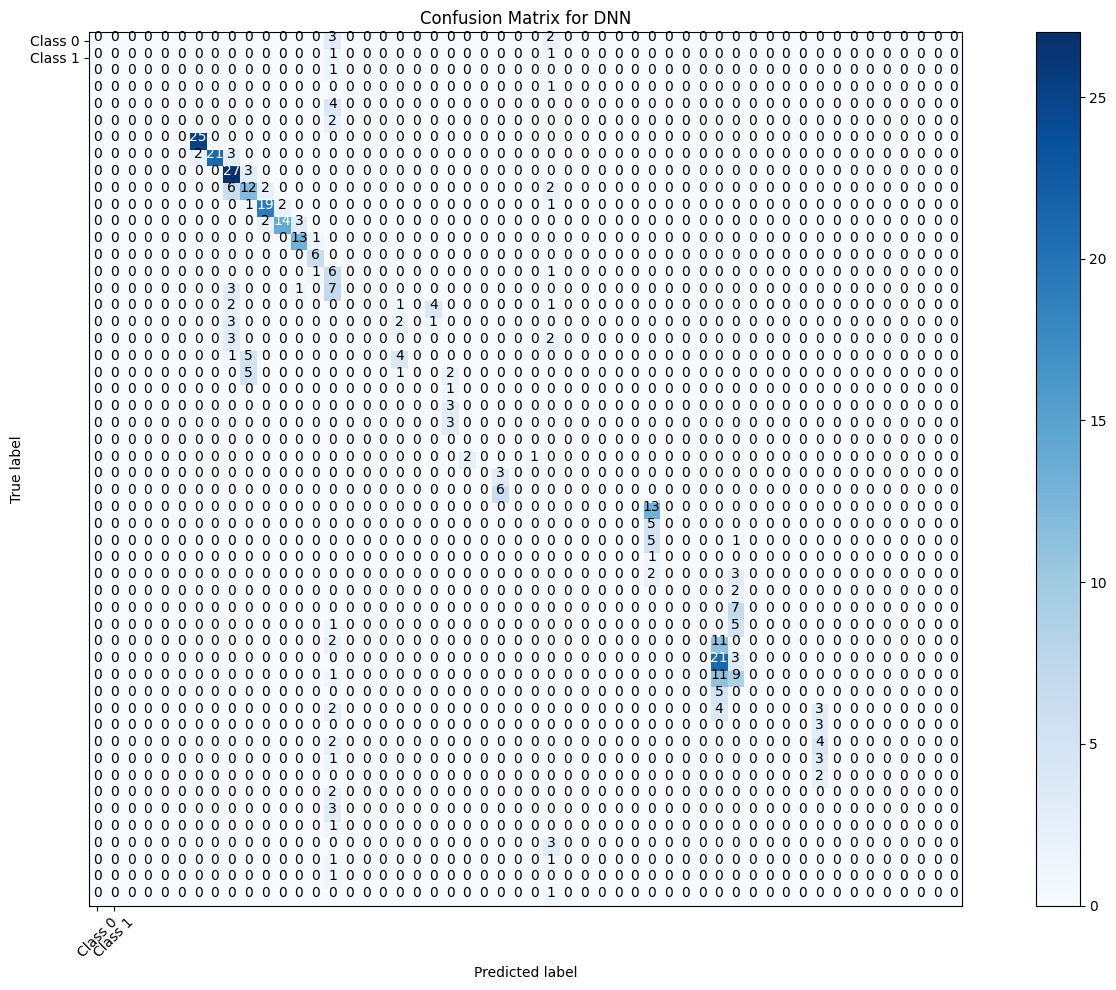

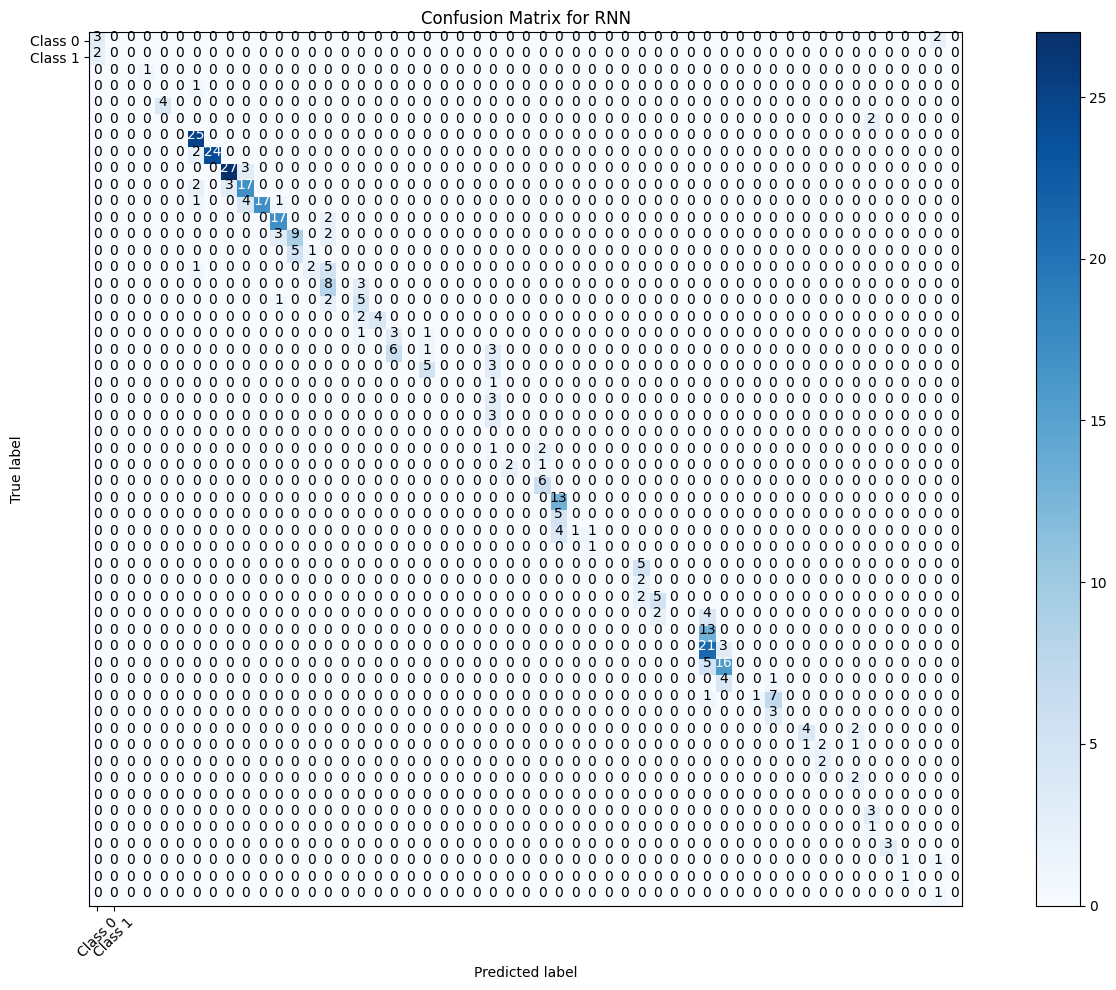

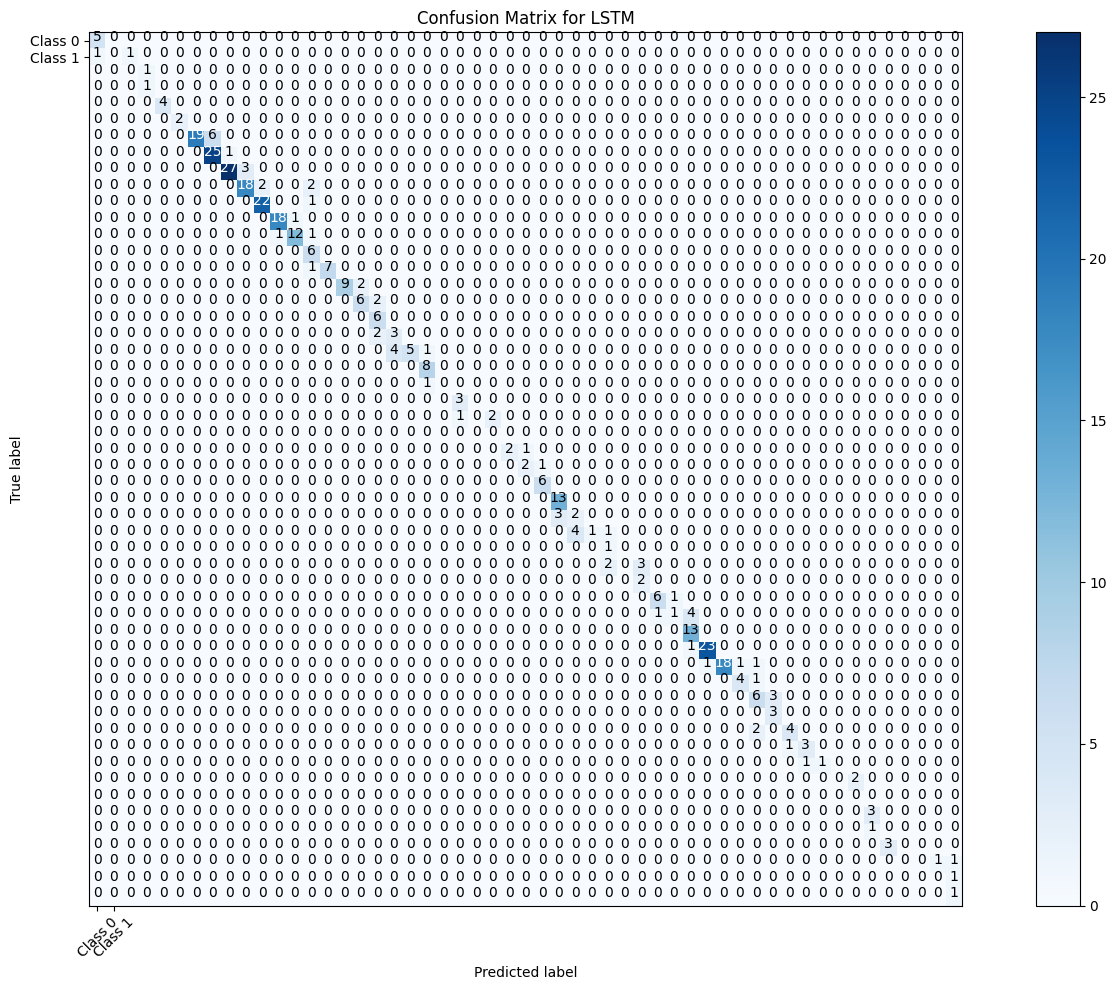

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, model_name, class_names=None):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(15, 10))

    # Plot the confusion matrix
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.colorbar()

    # Set tick marks and class names
    if class_names is not None:
        tick_marks = range(len(class_names))
        plt.xticks(tick_marks, class_names, rotation=45)
        plt.yticks(tick_marks, class_names)
    else:
        plt.xticks(ticks=range(cm.shape[1]))
        plt.yticks(ticks=range(cm.shape[0]))

    # Add text for each cell
    thresh = cm.max() / 2.0
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, f"{cm[i, j]}",
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

# Plot confusion matrix for each model
plot_confusion_matrix(y_test_single, y_pred_logistic, model_name='Logistic Regression', class_names=['Class 0', 'Class 1'])
plot_confusion_matrix(y_test_single, y_pred_ffn, model_name='FFNN', class_names=['Class 0', 'Class 1'])
plot_confusion_matrix(y_test_single, y_pred_dnn, model_name='DNN', class_names=['Class 0', 'Class 1'])
plot_confusion_matrix(y_test_single, y_pred_rnn, model_name='RNN', class_names=['Class 0', 'Class 1'])
plot_confusion_matrix(y_test_single, y_pred_lstm, model_name='LSTM', class_names=['Class 0', 'Class 1'])

In [ ]:
def plot_multiclass_roc_curve_subset(model, X_test, y_test, model_name, classes_to_plot=5):
    y_test_binarized = label_binarize(y_test, classes=np.unique(y_test)) if len(y_test.shape) == 1 else y_test
    y_pred_prob = model.predict(X_test)

    plt.figure(figsize=(8, 6))
    for i in range(min(classes_to_plot, y_test_binarized.shape[1])):
        fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_prob[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{model_name} - Class {i} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('Multi-Class ROC Curve (Subset)')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()

# Example: plot only the first 5 classes
plot_multiclass_roc_curve_subset(logistic_model, X_test, y_test, model_name='Logistic Regression', classes_to_plot=5)
plot_multiclass_roc_curve_subset(ffnn_model, X_test, y_test, model_name='FeedForward Neural Network', classes_to_plot=5)
plot_multiclass_roc_curve_subset(dnn_model, X_test, y_test, model_name='DNN', classes_to_plot=5)
plot_multiclass_roc_curve_subset(rnn_model, X_test, y_test, model_name='RNN', classes_to_plot=5)
plot_multiclass_roc_curve_subset(lstm_model, X_test, y_test, model_name='LSTM', classes_to_plot=5)

In [ ]:
# Preision-Recall Curve
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import numpy as np

def plot_multiclass_precision_recall_curve(model, X_test, y_test, model_name, num_classes=5):
    # Predict probabilities for each class
    y_pred_prob = model.predict(X_test)

    # Limit the number of classes to plot to make the chart readable
    classes_to_plot = min(num_classes, y_test.shape[1])

    plt.figure(figsize=(10, 8))

    # Iterate over each class and plot the precision-recall curve
    for i in range(classes_to_plot):
        precision, recall, _ = precision_recall_curve(y_test[:, i], y_pred_prob[:, i])
        average_precision = average_precision_score(y_test[:, i], y_pred_prob[:, i])
        plt.plot(recall, precision, label=f'{model_name} - Class {i} (AP = {average_precision:.2f})')

    # Plot the micro-average Precision-Recall curve across all classes
    precision_micro, recall_micro, _ = precision_recall_curve(y_test.ravel(), y_pred_prob.ravel())
    average_precision_micro = average_precision_score(y_test, y_pred_prob, average="micro")
    plt.plot(recall_micro, precision_micro, label=f'{model_name} Micro-average (AP = {average_precision_micro:.2f})', linestyle='--', color='black')

    plt.title(f'{model_name} Multi-Class Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

# Example call
plot_multiclass_precision_recall_curve(logistic_model, X_test, y_test, model_name='Logistic Regression')
plot_multiclass_precision_recall_curve(logistic_model, X_test, y_test, model_name='FFNN')
plot_multiclass_precision_recall_curve(logistic_model, X_test, y_test, model_name='DNN')
plot_multiclass_precision_recall_curve(logistic_model, X_test, y_test, model_name='RNN')
plot_multiclass_precision_recall_curve(logistic_model, X_test, y_test, model_name='LSTM')

In [ ]:
# Learning Curve

def plot_learning_curve(history, model_name):
    plt.figure(figsize=(14, 6))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.show()

# Example call
plot_learning_curve(logistic_history, model_name='Logistic Regression')
plot_learning_curve(logistic_history, model_name='FFNN')
plot_learning_curve(logistic_history, model_name='DNN')
plot_learning_curve(logistic_history, model_name='RNN')
plot_learning_curve(logistic_history, model_name='LSTM')

In [ ]:
# Class Distribution
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_class_distribution(y, model_name='Dataset'):
    plt.figure(figsize=(35, 15))

    # Flatten y if it's multi-label (i.e., if it's a 2D array)
    if len(y.shape) > 1 and y.shape[1] > 1:
        y = np.argmax(y, axis=1)  # Converts multi-label to single-label by taking the class with the highest score

    sns.countplot(x=y)
    plt.title(f'Class Distribution in {model_name}')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.show()

# Example call
plot_class_distribution(y_train, model_name='Training Set')

In [25]:
#from google.colab import files
#files.download('linear_regression_plot.png')

## Statistics

In [ ]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load the data
filename = 'epsx1_real.csv'  # Replace with your file name
data = pd.read_csv(filename)

In [ ]:
# Display the first few rows of the data
print("First few rows of the data:")
print(data.head())

First few rows of the data:
   Photon Energy  Absorption
0           0.70        7.24
1           0.71        7.24
2           0.71        7.25
3           0.71        7.25
4           0.71        7.26


In [ ]:
# Descriptive Statistics
print("\nDescriptive Statistics:")
print(data.describe())


Descriptive Statistics:
       Photon Energy   Absorption
count     2000.00000  2000.000000
mean         3.20250     3.577885
std          1.44374    14.938928
min          0.70000   -25.990000
25%          1.95000   -13.085000
50%          3.20000     8.860000
75%          4.45000    13.865000
max          5.70000    28.810000


In [ ]:
# Checking for missing values
print("\nMissing Values in each column:")
print(data.isnull().sum())


Missing Values in each column:
Photon Energy    0
Absorption       0
dtype: int64


In [ ]:
# Correlation Matrix
print("\nCorrelation Matrix:")
correlation_matrix = data.corr()
print(correlation_matrix)


Correlation Matrix:
               Photon Energy  Absorption
Photon Energy       1.000000   -0.655584
Absorption         -0.655584    1.000000


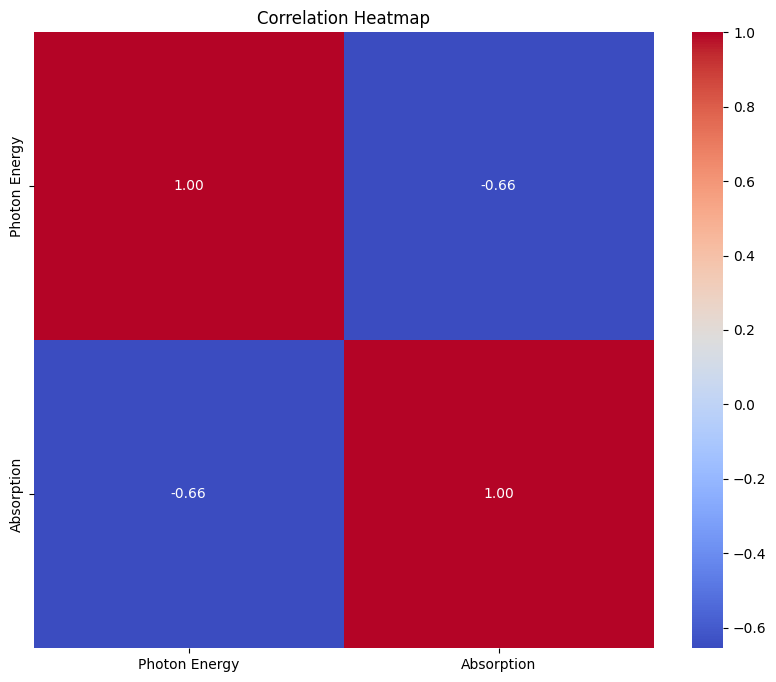

In [ ]:
# Visualization: Heatmap of Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

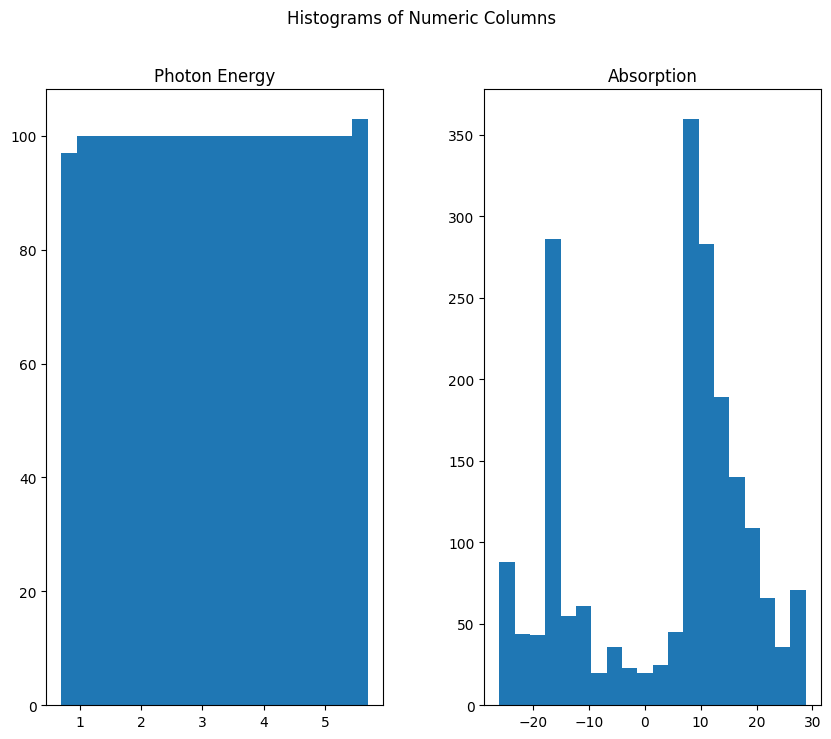

In [ ]:
# Histogram for each numeric column
data.hist(bins=20, figsize=(10, 8), grid=False)
plt.suptitle("Histograms of Numeric Columns")
plt.show()

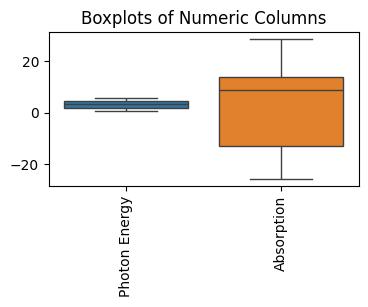

In [ ]:
# Boxplot for each numeric column
plt.figure(figsize=(4, 2))
sns.boxplot(data=data)
plt.title("Boxplots of Numeric Columns")
plt.xticks(rotation=90)
plt.show()

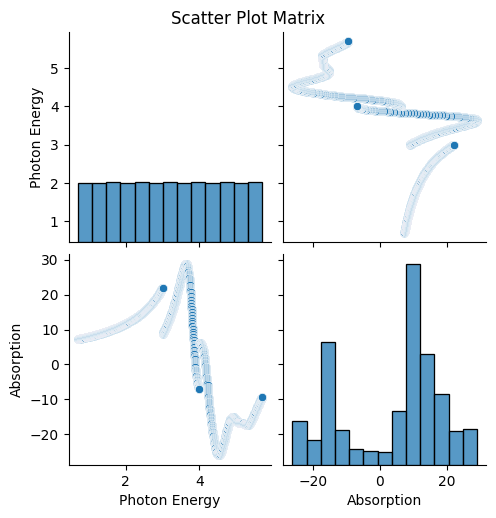

In [ ]:
# Scatter plot matrix for pairs of variables
sns.pairplot(data)
plt.suptitle("Scatter Plot Matrix", y=1.02)
plt.show()